In [35]:
!pip install openpyxl
!pip install -r req.txt

In [36]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
%matplotlib inline

In [37]:
# Q1. Load the flight price dataset and examine its dimensions. How many rows and columns does the dataset have?
df = pd.read_excel('datasets/flight_price.xlsx')
df.head()
dimensions = df.shape
print(f"The dataset has {dimensions[0]} rows and {dimensions[1]} columns.")

The dataset has 10683 rows and 11 columns.


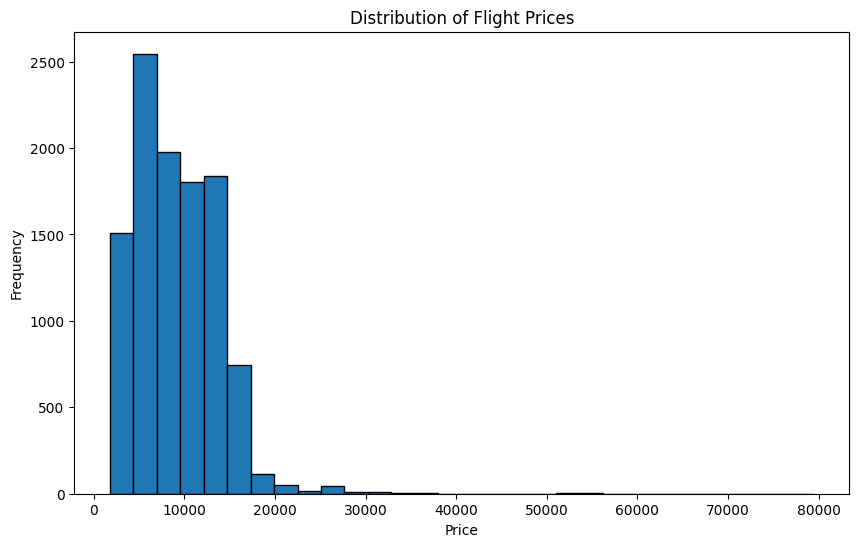

In [38]:
# Q2. What is the distribution of flight prices in the dataset? Create a histogram to visualize the distribution.
import matplotlib.pyplot as plt

# Plot the histogram
plt.figure(figsize=(10, 6))
plt.hist(df['Price'], bins=30, edgecolor='black')
plt.title('Distribution of Flight Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()


In [39]:
# Q3 What is the range of prices in the dataset? What is the minimum and maximum price?
min_price = df['Price'].min()
max_price = df['Price'].max()

print(f"The minimum price is {min_price}")
print(f"The maximum price is {max_price}")


The minimum price is 1759
The maximum price is 79512


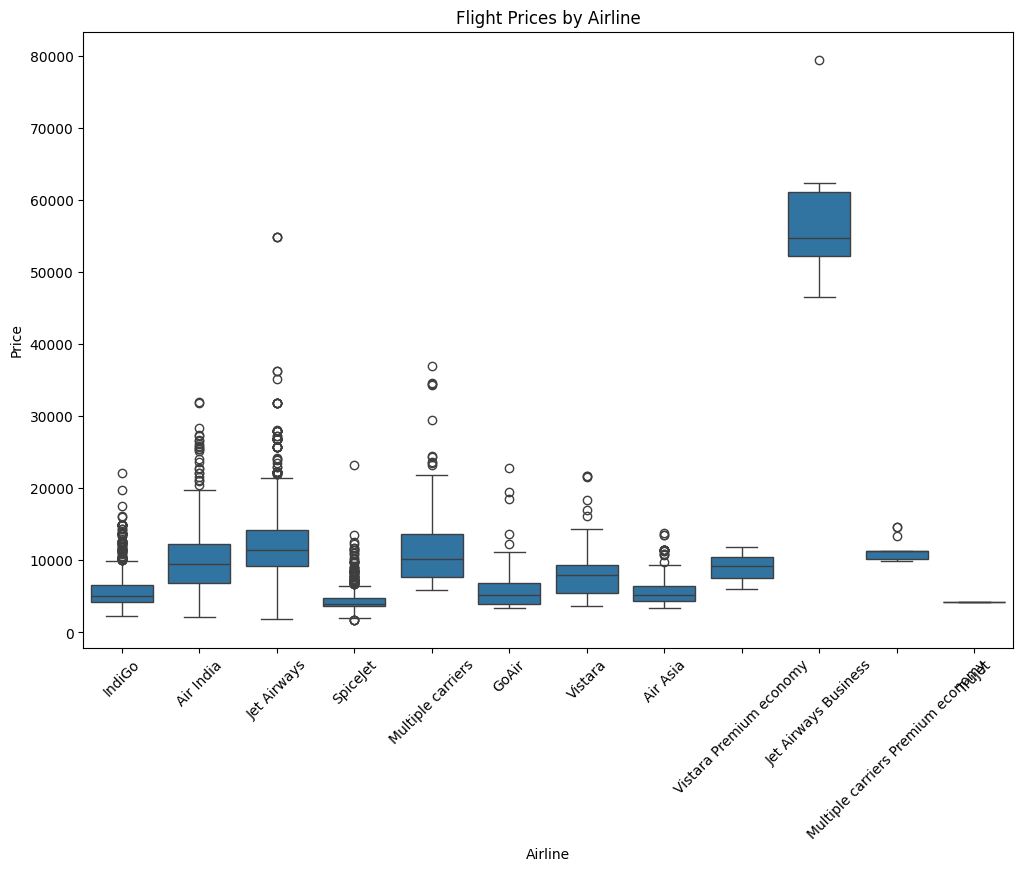

In [40]:
# Q4. How does the price of flights vary by airline? Create a boxplot to compare the prices of different airlines.

# Plot the boxplot
plt.figure(figsize=(12, 8))
sns.boxplot(x='Airline', y='Price', data=df)
plt.title('Flight Prices by Airline')
plt.xlabel('Airline')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.show()


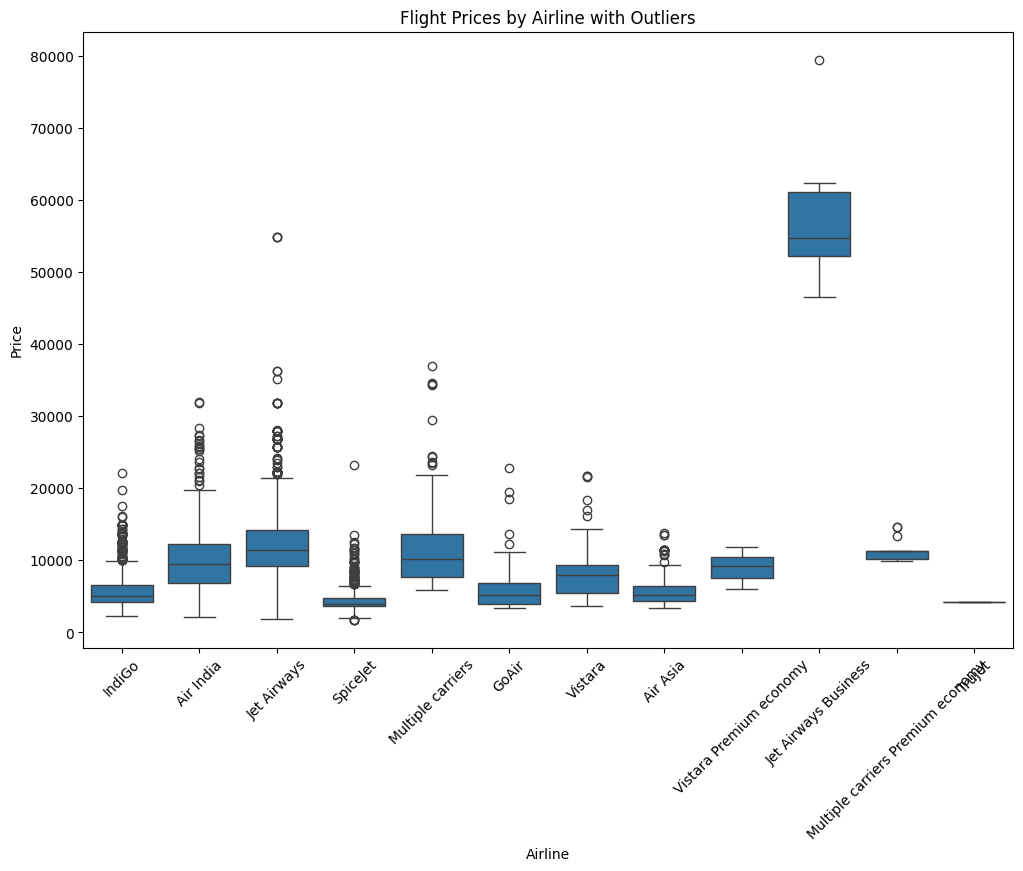

Number of potential outliers: 94
               Airline Date_of_Journey    Source Destination  \
123          Air India       1/03/2019     Delhi      Cochin   
396  Multiple carriers       1/03/2019     Delhi      Cochin   
486        Jet Airways      01/03/2019  Banglore   New Delhi   
510        Jet Airways      01/03/2019  Banglore   New Delhi   
597          Air India       6/03/2019    Mumbai   Hyderabad   

                     Route Dep_Time  Arrival_Time Duration Total_Stops  \
123        DEL → BOM → COK    23:00  19:15 02 Mar  20h 15m      1 stop   
396        DEL → BOM → COK    12:50         19:15   6h 25m      1 stop   
486        BLR → BOM → DEL    08:55         15:15   6h 20m      1 stop   
510        BLR → BOM → DEL    07:00         12:25   5h 25m      1 stop   
597  BOM → JDH → DEL → HYD    09:40  15:15 07 Mar  29h 35m     2 stops   

    Additional_Info  Price  
123         No info  27430  
396         No info  36983  
486         No info  26890  
510         No info  

In [41]:
# Q5. Are there any outliers in the dataset? Identify any potential outliers using a boxplot and describe how they may impact your analysis.

# Plot the boxplot to identify outliers
plt.figure(figsize=(12, 8))
sns.boxplot(x='Airline', y='Price', data=df)
plt.title('Flight Prices by Airline with Outliers')
plt.xlabel('Airline')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.show()

# Identifying outliers in the dataset
Q1 = df['Price'].quantile(0.25)
Q3 = df['Price'].quantile(0.75)
IQR = Q3 - Q1

outliers = df[(df['Price'] < (Q1 - 1.5 * IQR)) | (df['Price'] > (Q3 + 1.5 * IQR))]
print(f"Number of potential outliers: {outliers.shape[0]}")

# Displaying some of the outliers
print(outliers.head())


### Q6: Identifying the Peak Travel Season

To identify the peak travel season, you would analyze features related to the timing of flights and prices. The relevant features in the dataset include `Date_of_Journey`, `Price`, and potentially `Additional_Info` if it contains any seasonal or promotional data.

#### Steps to Analyze:

1. **Extract Month and Year from `Date_of_Journey`**:
   - This will help in grouping the data by month and year to identify trends over time.

2. **Calculate Average Monthly Prices**:
   - Aggregate the prices by month and year to see when the prices are highest, indicating peak demand.

3. **Count Number of Flights per Month**:
   - Higher numbers of flights in certain months can indicate peak travel periods.

4. **Consider Any Seasonal Patterns**:
   - Look for patterns such as holidays, school vacations, or other significant events.



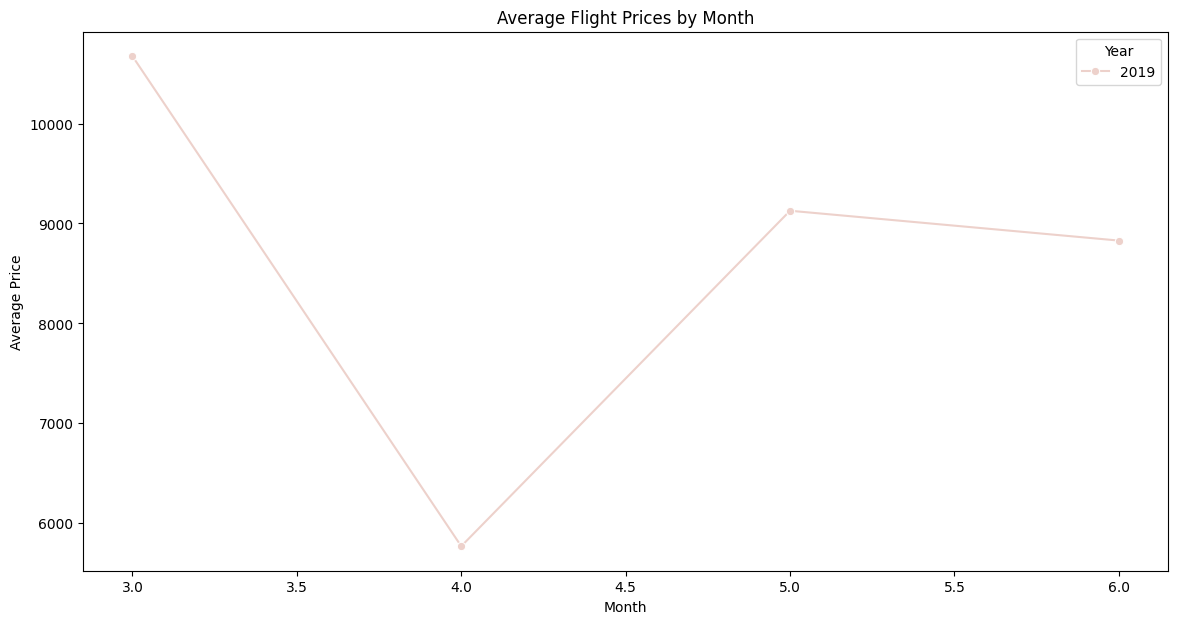

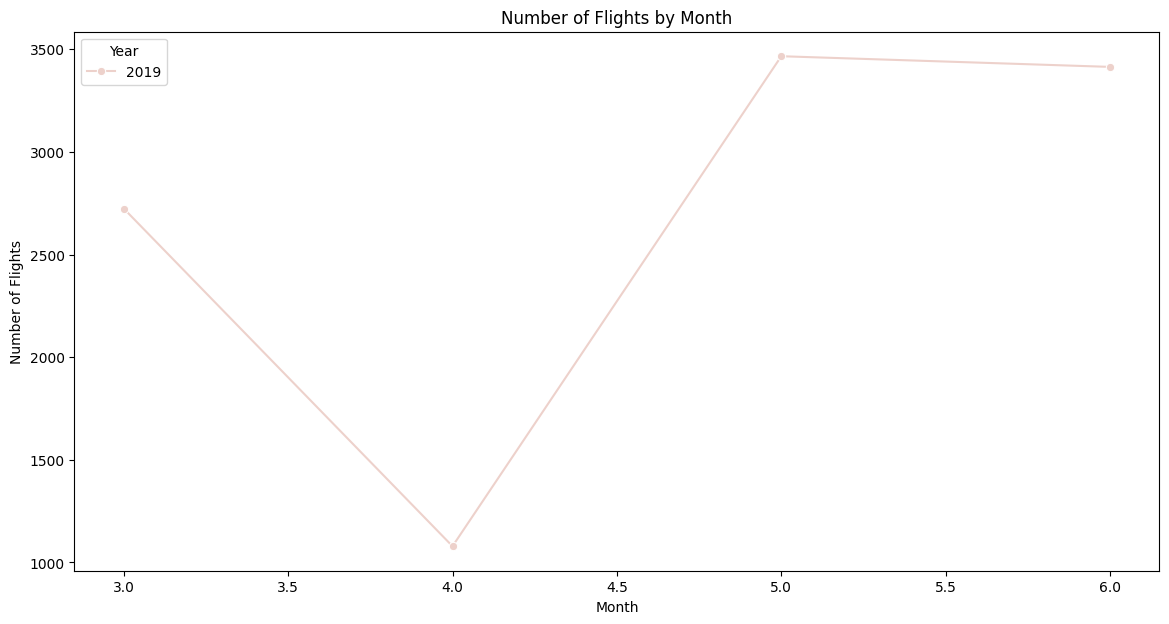

In [42]:
# Convert Date_of_Journey to datetime
df['Date_of_Journey'] = pd.to_datetime(df['Date_of_Journey'], format='%d/%m/%Y')

# Extract month and year
df['Month'] = df['Date_of_Journey'].dt.month
df['Year'] = df['Date_of_Journey'].dt.year

# Calculate average price per month
avg_price_per_month = df.groupby(['Year', 'Month'])['Price'].mean().reset_index()

# Count number of flights per month
flights_per_month = df.groupby(['Year', 'Month'])['Price'].count().reset_index()
flights_per_month.columns = ['Year', 'Month', 'Flight_Count']

# Merge the two dataframes for analysis
seasonal_data = pd.merge(avg_price_per_month, flights_per_month, on=['Year', 'Month'])

# Plotting the results
plt.figure(figsize=(14, 7))
sns.lineplot(data=seasonal_data, x='Month', y='Price', hue='Year', marker='o')
plt.title('Average Flight Prices by Month')
plt.xlabel('Month')
plt.ylabel('Average Price')
plt.show()

plt.figure(figsize=(14, 7))
sns.lineplot(data=seasonal_data, x='Month', y='Flight_Count', hue='Year', marker='o')
plt.title('Number of Flights by Month')
plt.xlabel('Month')
plt.ylabel('Number of Flights')
plt.show()


```

#### Presentation to Boss:

- **Charts**: Present line charts showing average flight prices and the number of flights per month over multiple years.
- **Summary**: Highlight the months with the highest prices and flight counts, indicating peak travel periods. Mention any notable holidays or events that correspond with these peaks.

### Q7: Identifying Trends in Flight Prices

To identify trends in flight prices, analyze features like `Date_of_Journey`, `Dep_Time`, `Arrival_Time`, `Duration`, `Total_Stops`, `Airline`, and `Source`/`Destination`.

#### Steps to Analyze:

1. **Temporal Trends**:
   - Look at trends over time (daily, weekly, monthly).
2. **Time of Day**:
   - Analyze prices based on departure and arrival times.
3. **Duration and Stops**:
   - Check if the flight duration and number of stops affect prices.
4. **Airline**:
   - Compare price trends across different airlines.
5. **Routes**:
   - Analyze how prices vary by route.



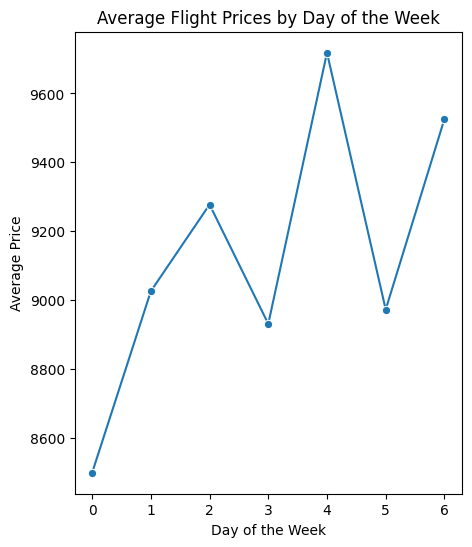

C:\Users\Asus\AppData\Local\Temp\ipykernel_21856\660743786.py:13: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Dep_Hour'] = pd.to_datetime(df['Dep_Time']).dt.hour


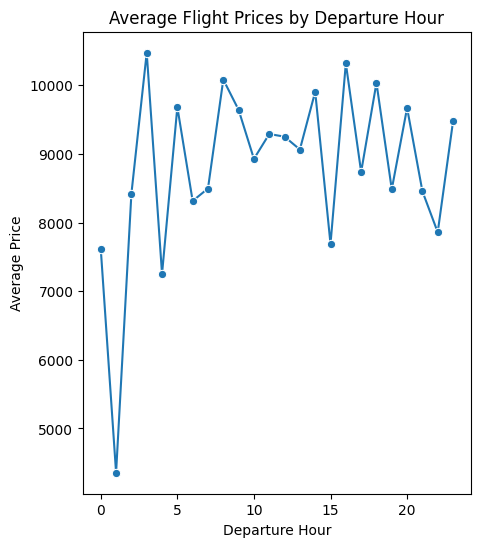

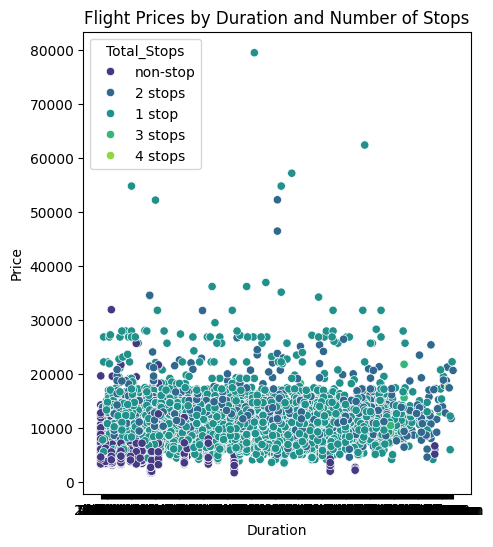

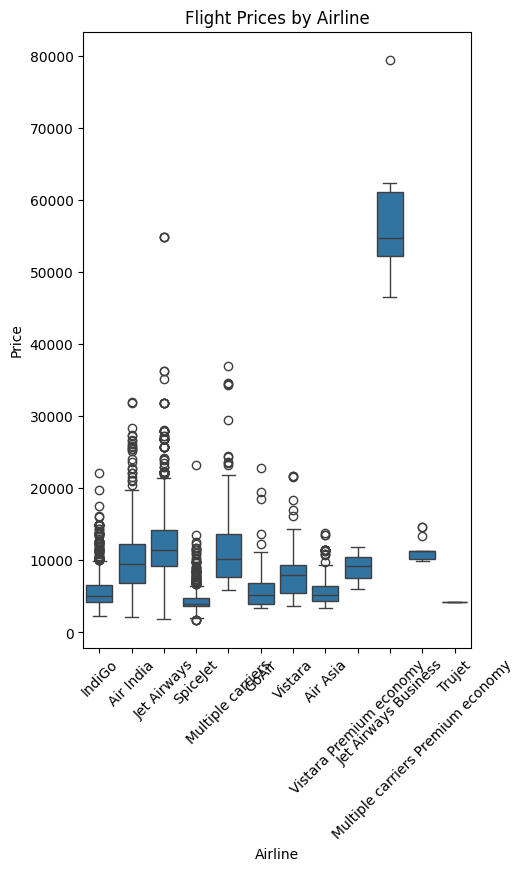

In [43]:
# Temporal trends
df['Day_of_Week'] = df['Date_of_Journey'].dt.dayofweek
avg_price_per_day = df.groupby('Day_of_Week')['Price'].mean().reset_index()

plt.figure(figsize=(5, 6))
sns.lineplot(data=avg_price_per_day, x='Day_of_Week', y='Price', marker='o')
plt.title('Average Flight Prices by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Average Price')
plt.show()

# Time of day trends
df['Dep_Hour'] = pd.to_datetime(df['Dep_Time']).dt.hour
avg_price_per_hour = df.groupby('Dep_Hour')['Price'].mean().reset_index()

plt.figure(figsize=(5, 6))
sns.lineplot(data=avg_price_per_hour, x='Dep_Hour', y='Price', marker='o')
plt.title('Average Flight Prices by Departure Hour')
plt.xlabel('Departure Hour')
plt.ylabel('Average Price')
plt.show()

# Duration and Stops
plt.figure(figsize=(5, 6))
sns.scatterplot(data=df, x='Duration', y='Price', hue='Total_Stops', palette='viridis')
plt.title('Flight Prices by Duration and Number of Stops')
plt.xlabel('Duration')
plt.ylabel('Price')
plt.show()

# Airline
plt.figure(figsize=(5, 8))
sns.boxplot(x='Airline', y='Price', data=df)
plt.title('Flight Prices by Airline')
plt.xlabel('Airline')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.show()




#### Presentation to Team:

- **Visualizations**: Use line plots, scatter plots, and boxplots to show trends.
- **Summary**: Describe key findings, such as the most expensive times to fly, how prices vary by airline, and the impact of flight duration and stops on prices.

### Q8: Identifying Factors Affecting Flight Prices

To identify factors affecting flight prices, analyze features such as `Date_of_Journey`, `Dep_Time`, `Arrival_Time`, `Duration`, `Total_Stops`, `Airline`, `Source`, `Destination`, and `Route`.

#### Steps to Analyze:

1. **Correlate Features with Price**:
   - Use correlation analysis to see which features have the strongest relationships with price.
2. **Regression Analysis**:
   - Conduct a multiple regression analysis to quantify the impact of different factors on flight prices.
3. **Categorical Analysis**:
   - Examine how categorical variables like `Airline`, `Source`, and `Destination` impact prices.



#### Presentation to Management:

- **Visualizations**: Use heatmaps for correlation, and summary tables or bar charts for regression results.
- **Summary**: Present key factors that significantly impact flight prices, with statistical evidence from the regression model. Highlight actionable insights, such as optimizing flight schedules or pricing strategies based on the identified factors.

<>:25: SyntaxWarning: invalid escape sequence '\d'
<>:26: SyntaxWarning: invalid escape sequence '\d'
<>:25: SyntaxWarning: invalid escape sequence '\d'
<>:26: SyntaxWarning: invalid escape sequence '\d'
C:\Users\Asus\AppData\Local\Temp\ipykernel_21856\787429830.py:25: SyntaxWarning: invalid escape sequence '\d'
  df['Duration_Hours'] = df['Duration'].str.extract('(\d+)h').astype(float)
C:\Users\Asus\AppData\Local\Temp\ipykernel_21856\787429830.py:26: SyntaxWarning: invalid escape sequence '\d'
  df['Duration_Minutes'] = df['Duration'].str.extract('(\d+)m').astype(float).fillna(0)
C:\Users\Asus\AppData\Local\Temp\ipykernel_21856\787429830.py:21: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Dep_Hour'] = pd.to_datetime(df['Dep_Time']).dt.hour
C:\Users\Asus\AppData\Local\Temp\ipykernel_21856\787429830.py:22: UserWarning: Could not infer format, s

Price               1.000000
Duration_Hours      0.508985
Total_Duration      0.506695
Day_of_Week         0.051613
Arrival_Hour        0.024264
Dep_Hour            0.006819
Month              -0.103651
Duration_Minutes   -0.124874
Day                -0.153738
Year                     NaN
Name: Price, dtype: float64


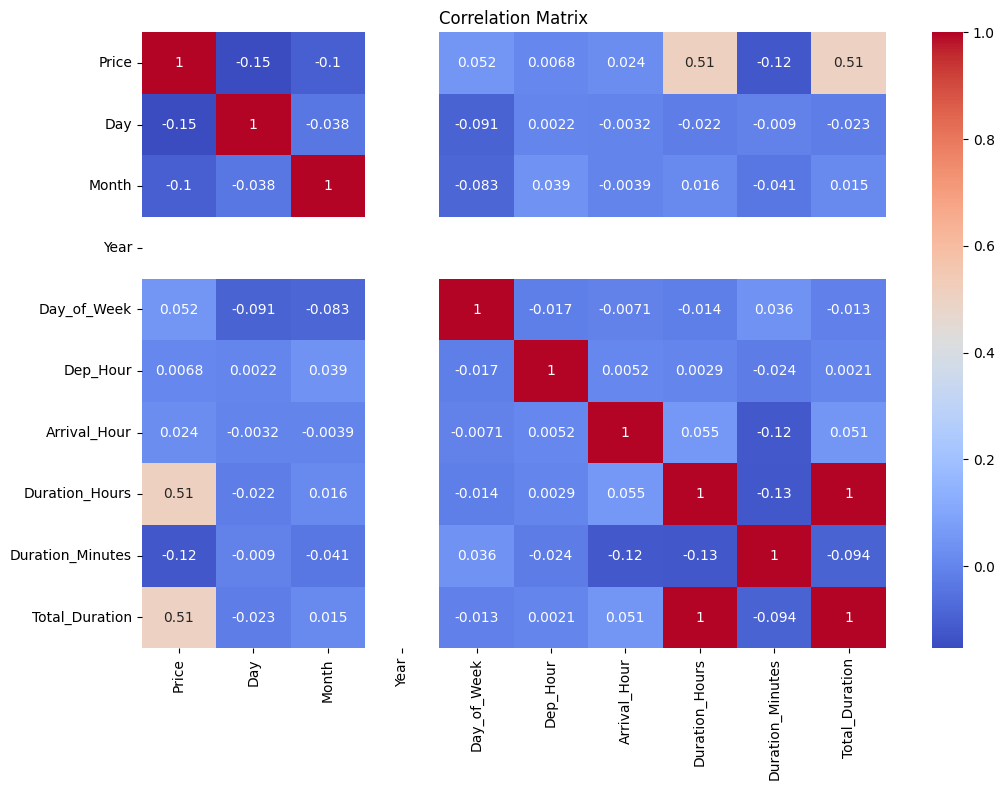

In [44]:
# 1. Correlation Analysis
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_excel('datasets/flight_price.xlsx')

# Convert Date_of_Journey to datetime
df['Date_of_Journey'] = pd.to_datetime(df['Date_of_Journey'], format='%d/%m/%Y')

# Extract day, month, year, and weekday
df['Day'] = df['Date_of_Journey'].dt.day
df['Month'] = df['Date_of_Journey'].dt.month
df['Year'] = df['Date_of_Journey'].dt.year
df['Day_of_Week'] = df['Date_of_Journey'].dt.dayofweek

# Extract hours from Dep_Time and Arrival_Time
df['Dep_Hour'] = pd.to_datetime(df['Dep_Time']).dt.hour
df['Arrival_Hour'] = pd.to_datetime(df['Arrival_Time']).dt.hour

# Convert Duration to total hours
df['Duration_Hours'] = df['Duration'].str.extract('(\d+)h').astype(float)
df['Duration_Minutes'] = df['Duration'].str.extract('(\d+)m').astype(float).fillna(0)
df['Total_Duration'] = df['Duration_Hours'] + df['Duration_Minutes'] / 60

# Select only numerical columns for correlation analysis
numerical_df = df.select_dtypes(include=['number'])

# Correlation analysis
correlation_matrix = numerical_df.corr()
print(correlation_matrix['Price'].sort_values(ascending=False))

# Visualize the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()



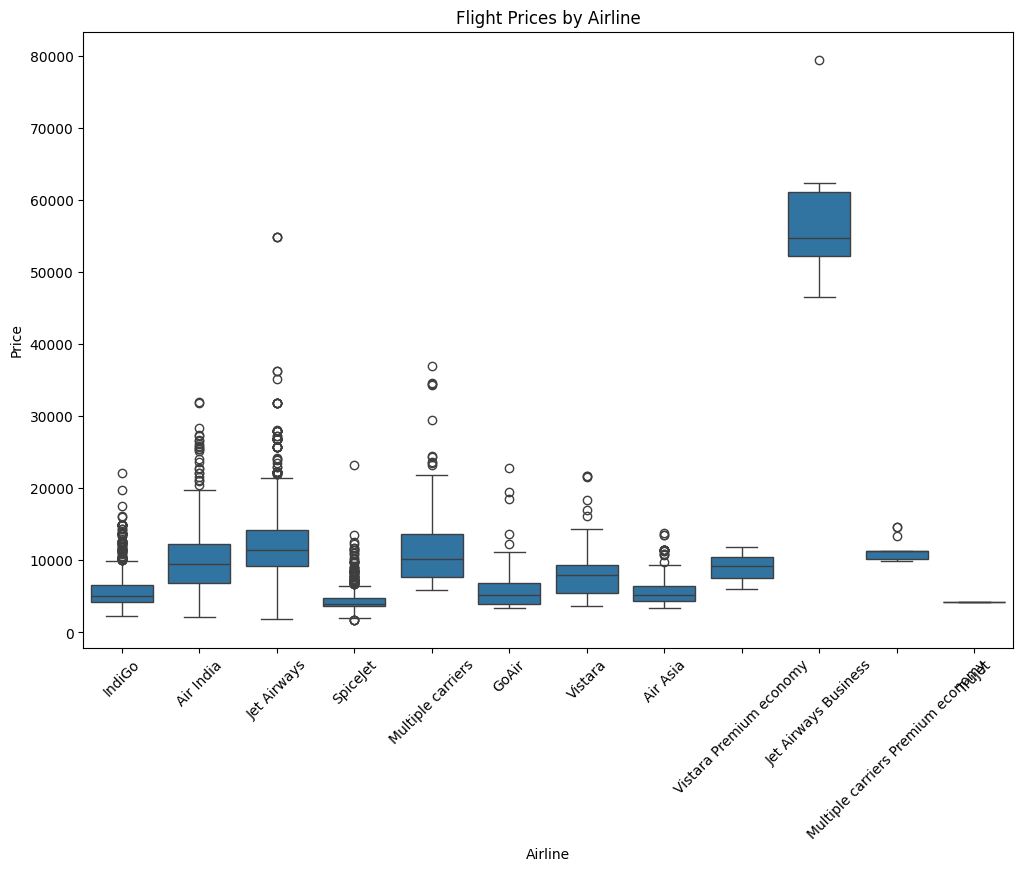

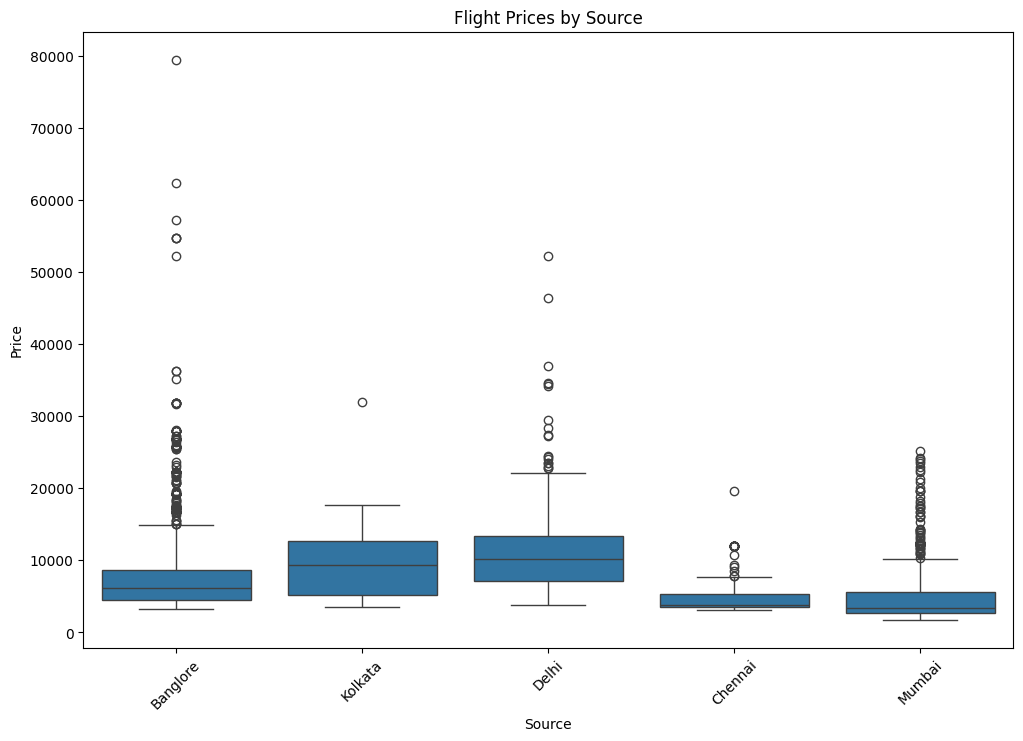

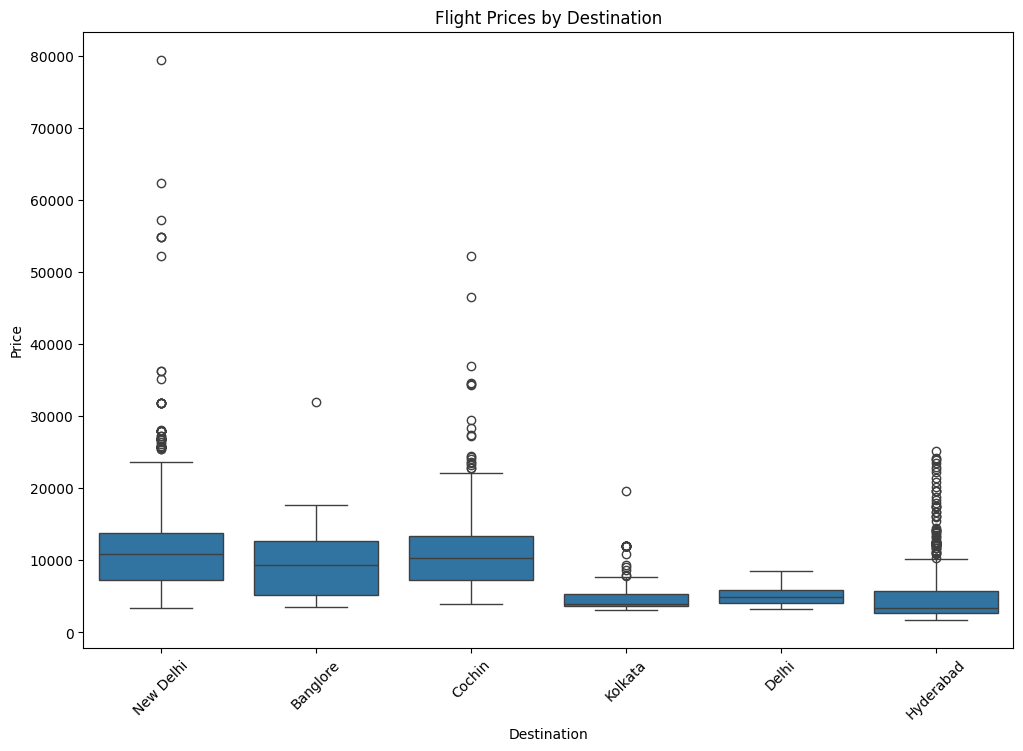

In [48]:
# Categorical Analysis

# Airline impact on price
plt.figure(figsize=(12, 8))
sns.boxplot(x='Airline', y='Price', data=df)
plt.title('Flight Prices by Airline')
plt.xlabel('Airline')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.show()

# Source impact on price
plt.figure(figsize=(12, 8))
sns.boxplot(x='Source', y='Price', data=df)
plt.title('Flight Prices by Source')
plt.xlabel('Source')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.show()

# Destination impact on price
plt.figure(figsize=(12, 8))
sns.boxplot(x='Destination', y='Price', data=df)
plt.title('Flight Prices by Destination')
plt.xlabel('Destination')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.show()


In [49]:
# Q9. Load the Google Playstore dataset and examine its dimensions. How many rows and columns does the dataset have?

# Load the Google Playstore dataset from the URL
url = 'https://raw.githubusercontent.com/krishnaik06/playstore-Dataset/main/googleplaystore.csv'
G_df = pd.read_csv(url)

# Examine the dimensions of the dataset
rows, columns = G_df.shape

# Output the number of rows and columns
print(f"The dataset has {rows} rows and {columns} columns.")

The dataset has 10841 rows and 13 columns.


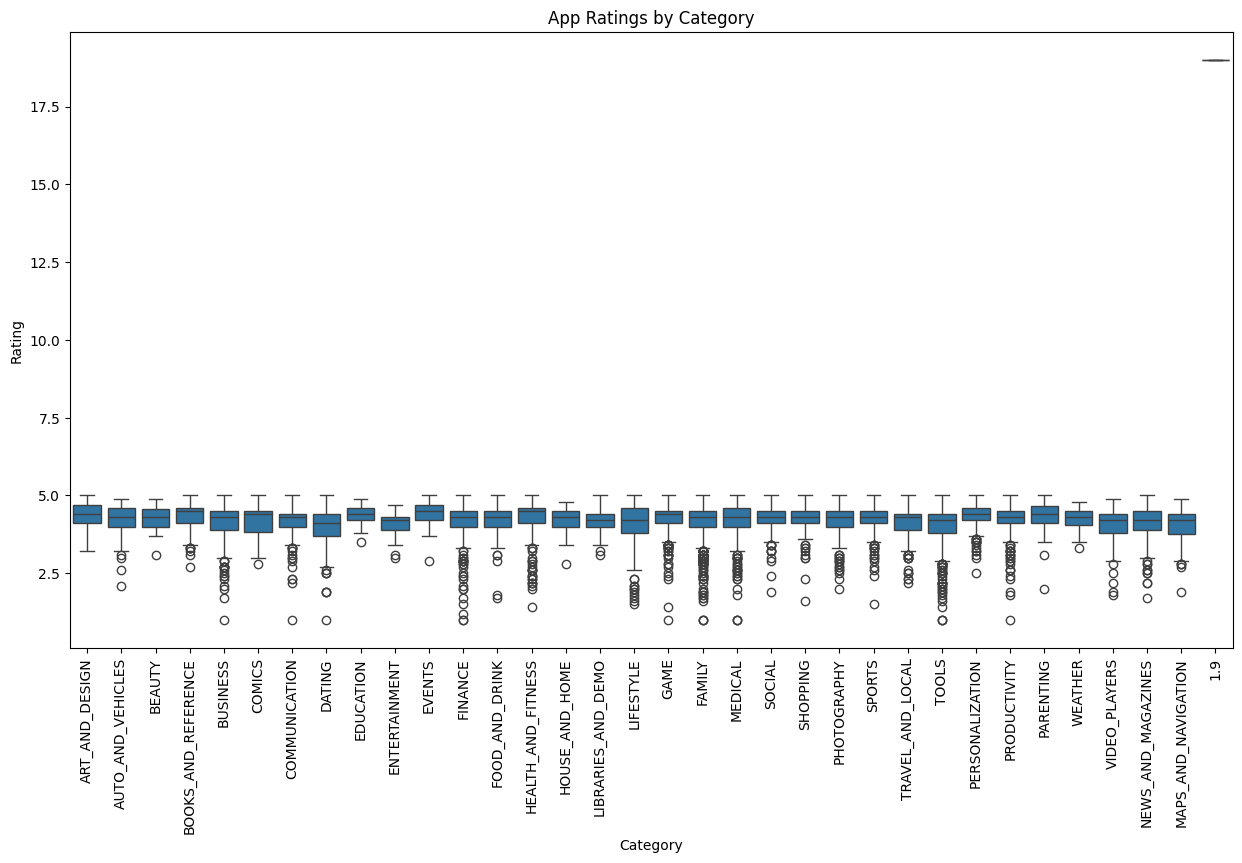

In [51]:

# Drop rows with missing 'Rating' values
G_df = G_df.dropna(subset=['Rating'])

# Create a boxplot to compare app ratings by category
plt.figure(figsize=(15, 8))
sns.boxplot(x='Category', y='Rating', data=G_df)
plt.xticks(rotation=90)
plt.title('App Ratings by Category')
plt.xlabel('Category')
plt.ylabel('Rating')
plt.show()

In [52]:
# Q11. Are there any missing values in the dataset? Identify any missing values and describe how they may impact your analysis.

# Check for missing values in the dataset
missing_values = G_df.isnull().sum()

# Identify columns with missing values and their counts
missing_columns = missing_values[missing_values > 0]

# Output the columns with missing values and their corresponding counts
print("Columns with missing values:")
print(missing_columns)

Columns with missing values:
Content Rating    1
Current Ver       4
Android Ver       3
dtype: int64


In [53]:
# Q12. What is the relationship between the size of an app and its rating? Create a scatter plot to visualize the relationship.

G_df = G_df.dropna(subset=['Rating', 'Size'])

# Convert 'Size' column to numerical (remove 'M' or 'k' suffix and convert to float)
G_df['Size'] = G_df['Size'].str.replace('M', '').str.replace('k', '').astype(float)

# Create a scatter plot to visualize the relationship between app size and rating
plt.figure(figsize=(10, 6))
plt.scatter(G_df['Size'], G_df['Rating'], alpha=0.5)
plt.title('Relationship Between App Size and Rating')
plt.xlabel('App Size (MB)')
plt.ylabel('Rating')
plt.grid(True)
plt.show()

ValueError: could not convert string to float: 'Varies with device'

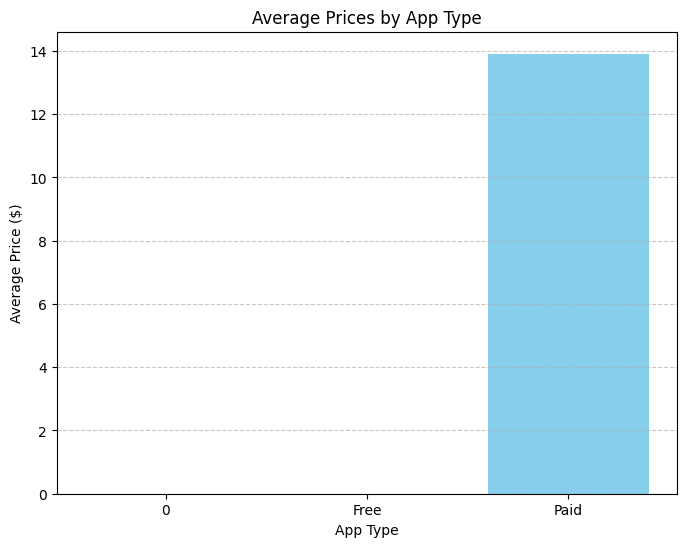

In [58]:
# Q13. How does the type of app affect its price? Create a bar chart to compare average prices by app type.

# Drop rows with missing 'Type' values
G_df = G_df.dropna(subset=['Type'])

# Replace 'Everyone' values in 'Price' column with 0
G_df['Price'] = G_df['Price'].replace('Everyone', '0')

# Convert 'Price' column to numerical (remove '$' suffix and convert to float)
G_df['Price'] = G_df['Price'].str.replace('$', '').astype(float)

# Group the data by app type and calculate the average price
avg_price_by_type = G_df.groupby('Type')['Price'].mean().reset_index()

# Create a bar chart to visualize the average prices by app type
plt.figure(figsize=(8, 6))
plt.bar(avg_price_by_type['Type'], avg_price_by_type['Price'], color=['skyblue', 'orange'])
plt.title('Average Prices by App Type')
plt.xlabel('App Type')
plt.ylabel('Average Price ($)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [61]:
# Q14. What are the top 10 most popular apps in the dataset? Create a frequency table to identify the apps with the highest number of installs.

# Replace 'Free' values in 'Installs' column with 0
G_df['Installs'] = G_df['Installs'].replace('Free', '0')

# Convert 'Installs' column to numerical (remove ',' and '+' suffix)
G_df['Installs'] = G_df['Installs'].str.replace(',', '').str.replace('+', '').astype(int)

# Create a frequency table for app names and their corresponding number of installs
app_installs_freq = G_df.groupby('App')['Installs'].sum().reset_index()

# Sort the frequency table in descending order based on the number of installs
app_installs_freq_sorted = app_installs_freq.sort_values(by='Installs', ascending=False)

# Display the top 10 most popular apps
top_10_apps = app_installs_freq_sorted.head(10)
print("Top 10 most popular apps based on the number of installs:")
print(top_10_apps)

Top 10 most popular apps based on the number of installs:
                                App    Installs
6808                 Subway Surfers  6000000000
4003                    Google News  4000000000
4422                      Instagram  4000000000
4007                  Google Photos  4000000000
3994                   Google Drive  4000000000
4162                       Hangouts  4000000000
1894               Candy Crush Saga  3500000000
6593  Skype - free IM & video calls  3000000000
3991   Google Chrome: Fast & Secure  3000000000
7020                   Temple Run 2  3000000000


# Q15. A company wants to launch a new app on the Google Playstore and has asked you to analyze the Google Playstore dataset to identify the most popular app categories. How would you approach this task, and what features would you analyze to make recommendations to the company?
To identify the most popular app categories on the Google Playstore, we can take the following approach:

1. **Data Understanding**: Understand the structure and content of the Google Playstore dataset.
2. **Exploratory Data Analysis (EDA)**: Conduct EDA to analyze various features and characteristics of the apps in the dataset.
3. **Analysis of App Categories**: Focus on app categories and analyze their popularity based on different factors.
4. **Recommendations**: Make recommendations to the company based on the analysis to identify the most popular app categories for launching a new app.

### Approach:

1. **Data Understanding**:
   - Load the Google Playstore dataset.
   - Examine the columns and data types.
   - Check for missing values and handle them appropriately.
   
2. **Exploratory Data Analysis (EDA)**:
   - Analyze the distribution of app categories.
   - Explore the number of apps in each category.
   - Investigate the distribution of app ratings across categories.
   - Examine the distribution of app installs across categories.
   
3. **Analysis of App Categories**:
   - Identify the top app categories based on the number of apps and installs.
   - Analyze the average ratings and number of installs for each category.
   
4. **Recommendations**:
   - Based on the analysis, recommend the most popular app categories to the company for launching their new app.
   - Consider factors such as category popularity, average ratings, and number of installs to make informed recommendations.

### Features to Analyze:

- **Category**: Analyze the distribution and popularity of different app categories.
- **Rating**: Examine the average ratings for each app category.
- **Installs**: Investigate the number of installs for apps in each category.
- **Reviews**: Analyze the number of reviews for apps in each category.
- **Size**: Explore the distribution of app sizes across categories.
- **Price**: Investigate the pricing strategy of apps in each category.

By analyzing these features, we can gain insights into the most popular app categories on the Google Playstore and provide valuable recommendations to the company for launching their new app.